In [1]:
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import os


In this lab you will apply Naive Bayes to a dataset of images with the goal of classifying each image as a smile (1) or non-smile (0). We are using a dataset of faces called GENKI.
First, we  download the dataset and explore it.


In [2]:
# Download dataset
# Note: this only needs to be done once!
if not os.path.exists("trainingLabels.npy"):
  !wget https://s3.amazonaws.com/jrwprojects/trainingLabels.npy
  !wget https://s3.amazonaws.com/jrwprojects/testingLabels.npy
  !wget https://s3.amazonaws.com/jrwprojects/trainingFaces.npy
  !wget https://s3.amazonaws.com/jrwprojects/testingFaces.npy

--2025-11-21 08:34:32--  https://s3.amazonaws.com/jrwprojects/trainingLabels.npy
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.198.56, 16.182.103.216, 3.5.22.178, ...
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.198.56|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16080 (16K) [binary/octet-stream]
Saving to: ‘trainingLabels.npy’

trainingLabels.npy  100%[===================>]  15.70K  --.-KB/s    in 0s      

2025-11-21 08:34:32 (131 MB/s) - ‘trainingLabels.npy’ saved [16080/16080]

--2025-11-21 08:34:32--  https://s3.amazonaws.com/jrwprojects/testingLabels.npy
Resolving s3.amazonaws.com (s3.amazonaws.com)... 16.15.185.51, 52.217.226.168, 16.15.191.42, ...
Connecting to s3.amazonaws.com (s3.amazonaws.com)|16.15.185.51|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14704 (14K) [binary/octet-stream]
Saving to: ‘testingLabels.npy’

testingLabels.npy   100%[===================>]  14.36K  --.-KB/s    in 0s      

2

In [3]:
# Load dataset
trainingFaces = np.load("trainingFaces.npy")
trainingLabels = np.load("trainingLabels.npy")
testingFaces = np.load("testingFaces.npy")
testingLabels = np.load("testingLabels.npy")
# Print out the dimensions of the arrays
print("trainingFaces shape: ", trainingFaces.shape)
print("trainingLabels shape: ", trainingLabels.shape)
print("testingFaces shape: ", testingFaces.shape)
print("testingLabels shape: ", testingLabels.shape)
# Print out basic statistics
print("Proportion 'smile' in training:", trainingLabels.mean())  # Proportion of training faces that are "smile"
print("Proportion 'smile' in testing:", testingLabels.mean())  # Proportion of testing faces that are "smile"

trainingFaces shape:  (2000, 576)
trainingLabels shape:  (2000,)
testingFaces shape:  (1828, 576)
testingLabels shape:  (1828,)
Proportion 'smile' in training: 0.5355
Proportion 'smile' in testing: 0.5464989059080962


Let's visualize some of the faces (they are the same as in the Logistic regression exercise). We first have to reshape each image from a 576-dimensional vector (which is convenient for classification with logistic regression) to a 24x24 array (which is convenient for visualization):

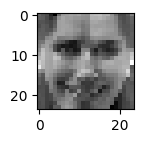

label:  1


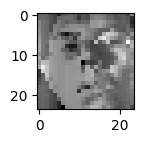

label:  0


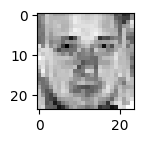

label:  0


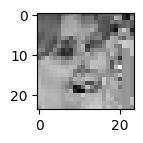

label:  1


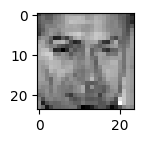

label:  1


In [4]:
for i in range(5):
  # Before rendering, we have to reshape the image vector into a 2-d array
  fig, ax = plt.subplots(figsize=(1.25, 1.25))
  ax.imshow(trainingFaces[i,:].reshape(24, 24), cmap='gray')
  plt.show()
  print("label: ", trainingLabels[i])

In most of the images, the label (smile vs. non-smile) is quite clear. However, in some it is not.

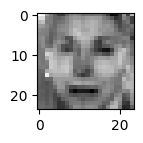

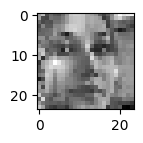

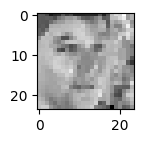

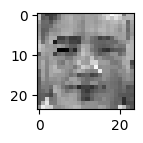

In [5]:
ambiguousIdxs = [ 187, 192, 566, 1401 ]
for idx in ambiguousIdxs:
  fig, ax = plt.subplots(figsize=(1.25, 1.25))
  ax.imshow(testingFaces[idx,:].reshape(24, 24), cmap='gray')
  plt.show()

## Task 1a: Naive Bayes for Smile Classification (1 Point)

**Your task**: Train a Naive Bayes classifier (use the Gaussian Naive Bayes class in sklearn) on the entire training dataset, and measure its accuracy (proportion of correctly classified images) on  the testing data.

In [6]:
naiveBayesClassifier = GaussianNB(var_smoothing=0.03)
# Train the model
naiveBayesClassifier.fit(trainingFaces, trainingLabels)
# Make predictions
predictions = naiveBayesClassifier.predict(testingFaces)
# Calculate accuracy
accuracy = accuracy_score(testingLabels, predictions)
print(accuracy)

0.736870897155361


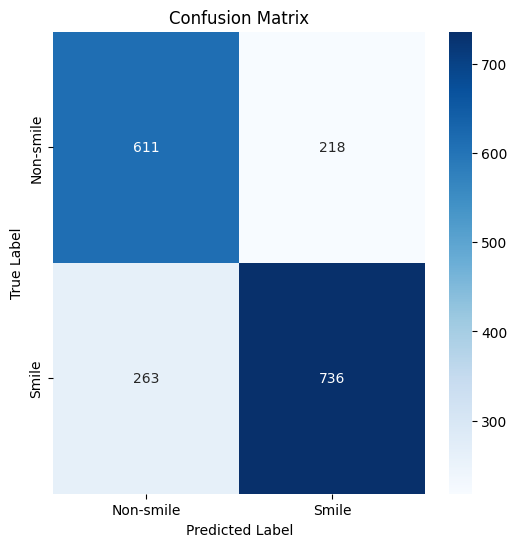

In [7]:
# Create Confusion Matrix
conf_matrix = confusion_matrix(testingLabels, predictions)

# Visualize Confusion Matrix
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Non-smile", "Smile"],
            yticklabels=["Non-smile", "Smile"])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

📢 **HAND-IN ON MOODLE** 📢:
Enter the testing accuracy of the trained model on Moodle (use two-digit accuracy).

## Task 1b: Smoothing in Naive Bayes (1 Point)

We will now investigate how different smoothing parameters (`var_smoothing`) affect the performance of a Gaussian Naive Bayes classifier for smile classification. Smoothing is a technique used to handle the problem of zero probabilities that can arise when a feature value not encountered during training is encountered during testing.

This technique is important for Naive Bayes classifiers, which rely on multiplying probabilities together. If even one probability is zero, the entire product becomes zero, and the classifier cannot make reasonable predictions.

Smoothing helps mitigate this issue by adding a small number to the probability estimates, ensuring that no probability is ever exactly zero.

Your task: Using the provided training and test data, experiment with how the size of the smoothing parameter impacts the test accuracy. In particular, vary `var_smoothing` over 1, 0.5, 0.2, 0.1, 0.01 ..., 0.000000001. For each value, train a logistic regression classifier  containing the same number of training examples. Then, measure *test* accuracy of the trained classifier (proportion of examples classified correctly). Plot the accuracy as a function of `var_smoothing`. Report in moodle the optimal value for the smoothing parameter, and attach your plot. Using a logarithmic scale for the smoothing values can be helpful for better visualization.

Smoothing: 1.00e-09, Accuracy: 0.7434
Smoothing: 1.00e-08, Accuracy: 0.7434
Smoothing: 1.00e-07, Accuracy: 0.7434
Smoothing: 1.00e-06, Accuracy: 0.7434
Smoothing: 1.00e-05, Accuracy: 0.7434
Smoothing: 1.00e-04, Accuracy: 0.7434
Smoothing: 1.00e-03, Accuracy: 0.7429
Smoothing: 1.00e-02, Accuracy: 0.7418
Smoothing: 1.00e-01, Accuracy: 0.7287
Smoothing: 1.00e+00, Accuracy: 0.6931


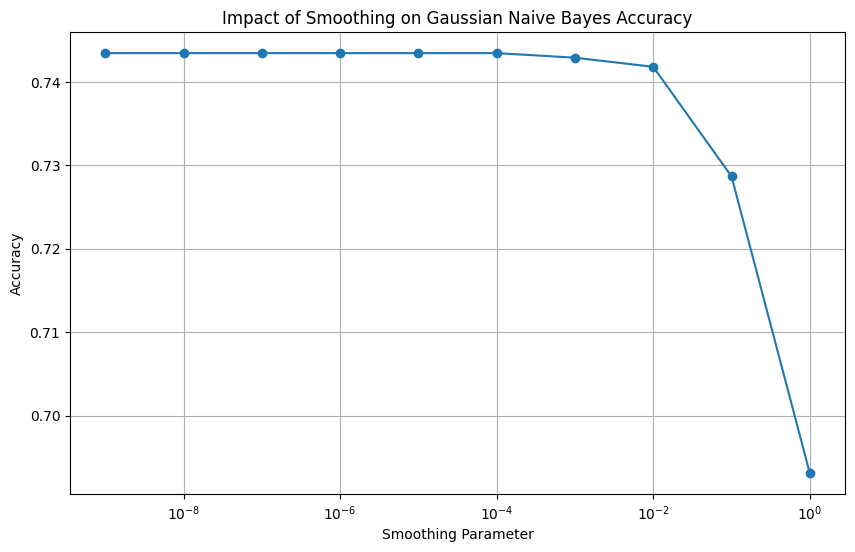

In [8]:
# Experiment with different smoothing values
smoothing_values = [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1]
accuracies = []

#TODO: Create the loop for training and evaluating the Gaussian Naive Bayes classifier with the current smoothing value
for smoothing in smoothing_values:
  naiveBayesClassifier = GaussianNB(var_smoothing=smoothing)
  naiveBayesClassifier.fit(trainingFaces, trainingLabels)
  predictions = naiveBayesClassifier.predict(testingFaces)
  accuracy = accuracy_score(testingLabels, predictions)
  accuracies.append(accuracy)


# Print accuracies for each smoothing value
for smoothing, accuracy in zip(smoothing_values, accuracies):
    print(f"Smoothing: {smoothing:.2e}, Accuracy: {accuracy:.4f}")

# Visualizing the results with a plot
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(smoothing_values, accuracies, marker='o', linestyle='-')
plt.xscale('log')  # Use a logarithmic scale for smoothing values
plt.xlabel("Smoothing Parameter")
plt.ylabel("Accuracy")
plt.title("Impact of Smoothing on Gaussian Naive Bayes Accuracy")
plt.grid(True)
plt.show()

📢 **HAND-IN** 📢:
On Moodle, provide the optimal value for the smoothing parameter, and upload your plot.

## Task 2. Effect of feature selection in Naive Bayes



Maximum Accuracy: 0.760 at index 478


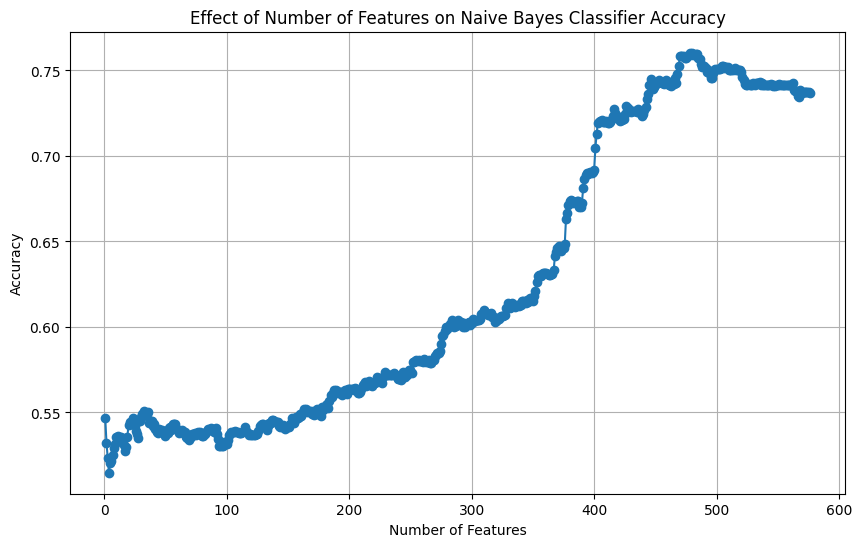

In [13]:
# Function to train the Gaussian Naive Bayes model on varying number of features
def evaluate_varying_features(trainingFaces, trainingLabels, testingFaces, testingLabels):
    num_features = trainingFaces.shape[1]
    accuracies = []

    for feature_count in range(1, num_features + 1):
      naiveBayesClassifier = GaussianNB(var_smoothing=0.03)
      naiveBayesClassifier.fit(trainingFaces[:, :feature_count], trainingLabels)
      predictions = naiveBayesClassifier.predict(testingFaces[:, :feature_count])
      accuracy = accuracy_score(testingLabels, predictions)
      accuracies.append((feature_count, accuracy))

    return accuracies

    # TODO: Loop over a range of feature subsets to evaluate the effect of different features.
    # Calculate predictions for each different number features
    # (note that the maximal number of features is given by the number of pixels in the image)


# Find the maximum accuracy with the corresponding number of features
accuracies = evaluate_varying_features(trainingFaces, trainingLabels, testingFaces, testingLabels)
max_accuracy_tuple = max(accuracies, key=lambda x: x[1])
max_index, max_accuracy = max_accuracy_tuple

print(f"Maximum Accuracy: {max_accuracy:.3f} at index {max_index}")


# Plot the accuracies against number of features used
feature_counts, accuracy_values = zip(*accuracies)
plt.figure(figsize=(10, 6))
plt.plot(feature_counts, accuracy_values, marker='o')
plt.xlabel('Number of Features')
plt.ylabel('Accuracy')
plt.title('Effect of Number of Features on Naive Bayes Classifier Accuracy')
plt.grid(True)
plt.show()



📢 **HAND-IN TASK 2** 📢:
On Moodle, provide the maximum achieved accuracy, and the corresponding number of features (max_index, max_accuracy ). Use two digits after the decimal sign. Upload your plot.

##  Task 3. Naive Bayes vs. Logistic Regression (2 p)

 Compare the implementations of Gaussian Naive Bayes and Logistic Regression (as implemented in "L04_Logistic_Regression") for the smile classification task. Evaluate their performance using various metrics, such as accuracy, precision, recall, and F1-score.

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load your dataset (replace with your actual data loading)
# Assume your data is in 'X' (features) and 'y' (labels)
X = np.load("trainingFaces.npy")
y = np.load("trainingLabels.npy")

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Logistic Regression Model

#TODO: Define your model, implement the model inference and obtain predictions for the test dataset.
# Use 500 iterations of gradient descent (max_iter=500).

logreg = LogisticRegression(max_iter=500) #
logreg.fit(X_train, y_train)
logreg_preds = logreg.predict(X_test)

Now train the Naive Bayes Model.

In [19]:

#TODO: Define your model, implement the model inference and obtain predictions for the test dataset

nb = GaussianNB()
nb.fit(X_train, y_train)
nb_preds = nb.predict(X_test)

# Evaluate the models
def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    #TODO: define the f1 score: f1 = ...
    f1 = f1_score(y_true, y_pred)

    print(f"----- {model_name} Evaluation -----")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print("-" * 30)

evaluate_model(y_test, logreg_preds, "Logistic Regression")
evaluate_model(y_test, nb_preds, "Naive Bayes")

----- Logistic Regression Evaluation -----
Accuracy: 0.7200
Precision: 0.7419
Recall: 0.7419
F1-Score: 0.7419
------------------------------
----- Naive Bayes Evaluation -----
Accuracy: 0.7475
Precision: 0.7661
Recall: 0.7696
F1-Score: 0.7678
------------------------------


📢 **HAND-IN TASK 3A** 📢:
On Moodle, provide the F-score for the logistic regression (two digits after the decimal sign).

📢 **HAND-IN TASK 3B** 📢:
On Moodle, provide the F1-score for your Naive Bayes model (use two digits after the decimal sign).